In [70]:
from bs4 import BeautifulSoup
import requests

In [71]:
url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')  

In [73]:
soup.find_all('div')

[<div class="logo-search">
 <div class="mob-btn"><img alt="" src="img/icons/menu.png"/></div>
 <div class="logo"><a href="index.htm"><img alt="" src="img/eci-logo.png"/></a></div>
 <div class="lft-menu">
 <ul>
 <li><a href="index.htm"><span><img alt="" src="img/icons/home.png"/></span> Home</a></li>
 <li><a href="hi/index.htm">Hindi <span><img alt="" src="img/icons/language.png"/></span></a></li>
 <!-- <li><a href=''>Search <span><img src='img/icons/search.png' alt=''></span></a></li> -->
 <li><a href="" onclick="window.location.href=window.location.href">Refresh <span><img alt="" src="img/icons/refresh.png"/></span></a></li>
 <li><img alt="" src="img/deshgarv-logo.png"/></li>
 </ul>
 </div>
 </div>,
 <div class="mob-btn"><img alt="" src="img/icons/menu.png"/></div>,
 <div class="logo"><a href="index.htm"><img alt="" src="img/eci-logo.png"/></a></div>,
 <div class="lft-menu">
 <ul>
 <li><a href="index.htm"><span><img alt="" src="img/icons/home.png"/></span> Home</a></li>
 <li><a href="

In [74]:
table = soup.find_all('div')[25]

In [75]:
print(table)

<div class="col-md-6 col-12">
<div class="card custom-card shadow-sm">
<div class="card-header">Party Wise Results Status</div>
<div class="card-body">
<div class="parent-wrap cardTble">
<div class="child-scroll">
<div class="rslt-table table-responsive">
<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>
<tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right

In [76]:
world_titles = soup.find_all('th')

In [77]:
world_titles

[<th style="text-align: left;">Party</th>,
 <th style="text-align:right">Won</th>,
 <th style="text-align:right">Leading</th>,
 <th style="text-align:right">Total</th>,
 <th>Total</th>,
 <th style="text-align:right">543</th>,
 <th style="text-align:right">0</th>,
 <th style="text-align:right">543</th>]

In [78]:
world_table_titles = [title.text for title in world_titles]
print(world_table_titles)

['Party', 'Won', 'Leading', 'Total', 'Total', '543', '0', '543']


In [79]:
# Remove the last three elements
world_table_titles= world_table_titles[:-4]

In [80]:
print(world_table_titles)

['Party', 'Won', 'Leading', 'Total']


In [81]:
import pandas as pd

In [82]:
df = pd.DataFrame(columns = world_table_titles)
df

,Party,Won,Leading,Total


In [87]:
column_data = table.find_all('tr')

In [89]:
for row in column_data:
    row_data = row.find_all('td')
    print(row_data)


[]
[<td style="text-align:left">Bharatiya Janata Party - BJP</td>, <td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>, <td style="text-align:right">
                                                                                        0
                                                                                    </td>, <td style="text-align:right">240</td>]
[<td style="text-align:left">Indian National Congress - INC</td>, <td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>, <td style="text-align:right">
                                                                                        0
                                                                                    </td>, <td style="text-align:right">99</td>]
[<td style="text-align:left">Samajwadi Party - SP</td>, <td style="text-align:right">
<a href="partywisewinresultState-1680.htm">37</a>
</td>, <td style="text-align:right">
                      

In [98]:
for row in column_data:
    row_data = row.find_all('td')
    row_text = [td.get_text(strip=True) for td in row_data]
    print(row_text)


[]
['Bharatiya Janata Party - BJP', '240', '0', '240']
['Indian National Congress - INC', '99', '0', '99']
['Samajwadi Party - SP', '37', '0', '37']
['All India Trinamool Congress - AITC', '29', '0', '29']
['Dravida Munnetra Kazhagam - DMK', '22', '0', '22']
['Telugu Desam - TDP', '16', '0', '16']
['Janata Dal  (United) - JD(U)', '12', '0', '12']
['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9']
['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8']
['Shiv Sena - SHS', '7', '0', '7']
['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5']
['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4']
['Rashtriya Janata Dal - RJD', '4', '0', '4']
['Communist Party of India  (Marxist) - CPI(M)', '4', '0', '4']
['Indian Union Muslim League - IUML', '3', '0', '3']
['Aam Aadmi Party - AAAP', '3', '0', '3']
['Jharkhand Mukti Morcha - JMM', '3', '0', '3']
['Janasena Party - JnP', '2', '0', '2']
['Communist Party of India  (Marxist-Leninist)  (Liberatio

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Define column titles
world_table_titles = ['Party', 'Won', 'Leading', 'Total']

# Create an empty DataFrame
df = pd.DataFrame(columns=world_table_titles)

# Data extracted from the HTML table
data = [
    ['Bharatiya Janata Party - BJP', '240', '0', '240'],
    ['Indian National Congress - INC', '99', '0', '99'],
    ['Samajwadi Party - SP', '37', '0', '37'],
    ['All India Trinamool Congress - AITC', '29', '0', '29'],
    ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22'],
    ['Telugu Desam - TDP', '16', '0', '16'],
    ['Janata Dal  (United) - JD(U)', '12', '0', '12'],
    ['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9'],
    ['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8'],
    ['Shiv Sena - SHS', '7', '0', '7'],
    ['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5'],
    ['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4'],
    ['Rashtriya Janata Dal - RJD', '4', '0', '4'],
    ['Communist Party of India  (Marxist) - CPI(M)', '4', '0', '4'],
    ['Indian Union Muslim League - IUML', '3', '0', '3'],
    ['Aam Aadmi Party - AAAP', '3', '0', '3'],
    ['Jharkhand Mukti Morcha - JMM', '3', '0', '3'],
    ['Janasena Party - JnP', '2', '0', '2'],
    ['Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)', '2', '0', '2'],
    ['Janata Dal  (Secular) - JD(S)', '2', '0', '2'],
    ['Viduthalai Chiruthaigal Katchi - VCK', '2', '0', '2'],
    ['Communist Party of India - CPI', '2', '0', '2'],
    ['Rashtriya Lok Dal - RLD', '2', '0', '2'],
    ['Jammu & Kashmir National Conference - JKN', '2', '0', '2'],
    ['United People’s Party, Liberal - UPPL', '1', '0', '1'],
    ['Asom Gana Parishad - AGP', '1', '0', '1'],
    ['Hindustani Awam Morcha (Secular) - HAMS', '1', '0', '1'],
    ['Kerala Congress - KEC', '1', '0', '1'],
    ['Revolutionary Socialist Party - RSP', '1', '0', '1'],
    ['Nationalist Congress Party - NCP', '1', '0', '1'],
    ['Voice of the People Party - VOTPP', '1', '0', '1'],
    ['Zoram People’s Movement - ZPM', '1', '0', '1'],
    ['Shiromani Akali Dal - SAD', '1', '0', '1'],
    ['Rashtriya Loktantrik Party - RLTP', '1', '0', '1'],
    ['Bharat Adivasi Party - BHRTADVSIP', '1', '0', '1'],
    ['Sikkim Krantikari Morcha - SKM', '1', '0', '1'],
    ['Marumalarchi Dravida Munnetra Kazhagam - MDMK', '1', '0', '1'],
    ['Aazad Samaj Party (Kanshi Ram) - ASPKR', '1', '0', '1'],
    ['Apna Dal (Soneylal) - ADAL', '1', '0', '1'],
    ['AJSU Party - AJSUP', '1', '0', '1'],
    ['All India Majlis-E-Ittehadul Muslimeen - AIMIM', '1', '0', '1'],
    ['Independent - IND', '7', '0', '7']
]

# Add the data to the DataFrame
for row in data:
    df.loc[len(df)] = row

# Convert numerical columns to integers
df['Won'] = df['Won'].astype(int)
df['Leading'] = df['Leading'].astype(int)
df['Total'] = df['Total'].astype(int)

# Display the DataFrame
print(df)





                                                Party  Won  Leading  Total
0                        Bharatiya Janata Party - BJP  240        0    240
1                      Indian National Congress - INC   99        0     99
2                                Samajwadi Party - SP   37        0     37
3                 All India Trinamool Congress - AITC   29        0     29
4                     Dravida Munnetra Kazhagam - DMK   22        0     22
5                                  Telugu Desam - TDP   16        0     16
6                        Janata Dal  (United) - JD(U)   12        0     12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9        0      9
8   Nationalist Congress Party – Sharadchandra Paw...    8        0      8
9                                     Shiv Sena - SHS    7        0      7
10             Lok Janshakti Party(Ram Vilas) - LJPRV    5        0      5
11      Yuvajana Sramika Rythu Congress Party - YSRCP    4        0      4
12                       

In [95]:

print("Top 5 parties by total seats won:")
print(df.sort_values(by='Total', ascending=False).head(5))

Top 5 parties by total seats won:
                                 Party  Won  Leading  Total
0         Bharatiya Janata Party - BJP  240        0    240
1       Indian National Congress - INC   99        0     99
2                 Samajwadi Party - SP   37        0     37
3  All India Trinamool Congress - AITC   29        0     29
4      Dravida Munnetra Kazhagam - DMK   22        0     22


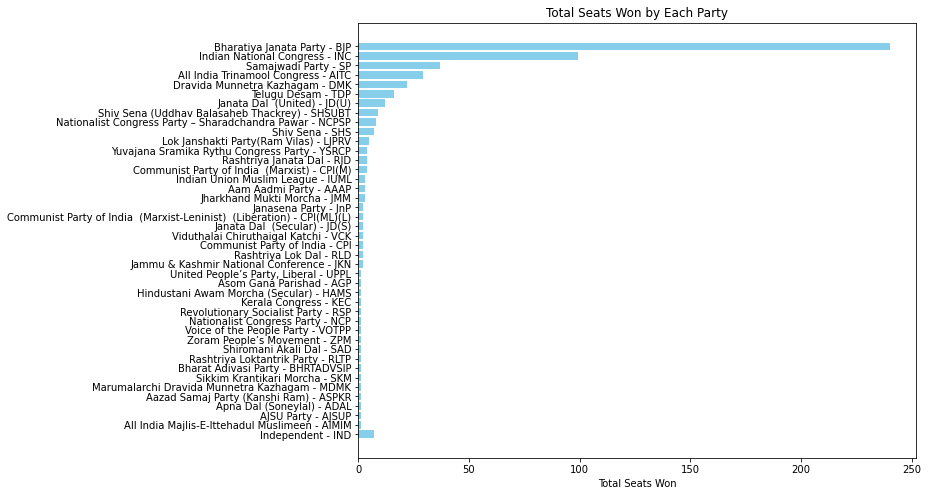

In [108]:
# 1. Bar Chart for Total Seats Won by Each Party
plt.figure(figsize=(10, 8))
plt.barh(df['Party'], df['Total'], color='skyblue')
plt.xlabel('Total Seats Won')
plt.title('Total Seats Won by Each Party')
plt.gca().invert_yaxis()
plt.show()

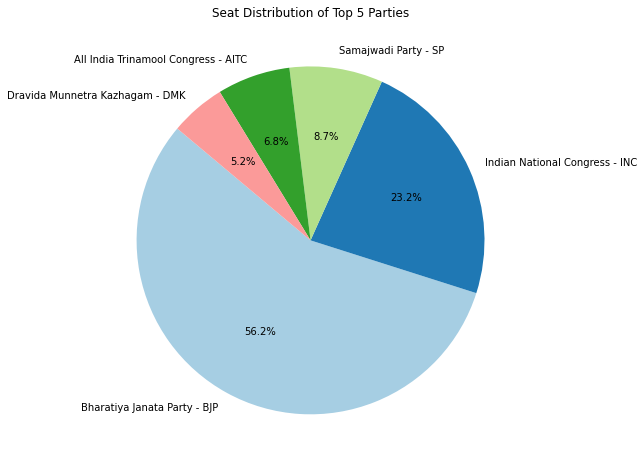

In [106]:
# 2. Pie Chart for Seat Distribution of Top 5 Parties
top_5_parties = df.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_5_parties['Total'], labels=top_5_parties['Party'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Seat Distribution of Top 5 Parties')
plt.show()

In [109]:
# Insights

# 1. Top 5 parties by total seats won
print("Top 5 parties by total seats won:")
print(df.sort_values(by='Total', ascending=False).head(5))
print(top_5_parties)

Top 5 parties by total seats won:
                                 Party  Won  Leading  Total
0         Bharatiya Janata Party - BJP  240        0    240
1       Indian National Congress - INC   99        0     99
2                 Samajwadi Party - SP   37        0     37
3  All India Trinamool Congress - AITC   29        0     29
4      Dravida Munnetra Kazhagam - DMK   22        0     22
                                 Party  Won  Leading  Total
0         Bharatiya Janata Party - BJP  240        0    240
1       Indian National Congress - INC   99        0     99
2                 Samajwadi Party - SP   37        0     37
3  All India Trinamool Congress - AITC   29        0     29
4      Dravida Munnetra Kazhagam - DMK   22        0     22


In [110]:
# 2. Percentage of seats won by top 5 parties
total_seats = df['Total'].sum()
top_5_total = top_5_parties['Total'].sum()
percentage_top_5 = (top_5_total / total_seats) * 100
print(f"Percentage of seats won by the top 5 parties: {percentage_top_5:.2f}%")


Percentage of seats won by the top 5 parties: 78.64%


In [111]:
# 3. Total number of parties
total_parties = df.shape[0]
print(f"Total number of parties: {total_parties}")

Total number of parties: 42


In [112]:
# 4. Party with the maximum seats
max_seats_party = df.iloc[0]['Party']
max_seats = df.iloc[0]['Total']
print(f"Party with the maximum seats: {max_seats_party} ({max_seats} seats)")

Party with the maximum seats: Bharatiya Janata Party - BJP (240 seats)


In [113]:
# 5 Median Number of Seats Won
median_seats = df['Total'].median()
print(f"Median number of seats won: {median_seats}")


Median number of seats won: 2.0


In [114]:
#6 Standard Deviation of Seats Won
std_deviation = df['Total'].std()
print(f"Standard deviation of seats won: {std_deviation:.2f}")


Standard deviation of seats won: 39.47


In [115]:
# 7 Number of Parties with More Than 10 Seats
parties_above_10 = df[df['Total'] > 10].shape[0]
print(f"Number of parties with more than 10 seats: {parties_above_10}")


Number of parties with more than 10 seats: 7


In [116]:
# 8 Top 3 Parties' Combined Seats:
top_3_total = df.head(3)['Total'].sum()
print(f"Total seats won by the top 3 parties: {top_3_total}")


Total seats won by the top 3 parties: 376


In [117]:
# 9 Least Represented Party
least_seats_party = df.iloc[-1]['Party']
least_seats = df.iloc[-1]['Total']
print(f"Party with the least seats: {least_seats_party} ({least_seats} seat)")


Party with the least seats: Independent - IND (7 seat)


In [118]:

# 10 Total Seats Won by Parties with Less Than 5 Seats
seats_less_than_5 = df[df['Total'] < 5]['Total'].sum()
print(f"Total seats won by parties with less than 5 seats: {seats_less_than_5}")


Total seats won by parties with less than 5 seats: 52
